# 📦 Import Libraries

In [1]:
%pip install lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import joblib

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
# from lazypredict.Supervised import LazyRegressor
from lightgbm import LGBMRegressor

In [6]:
from utils.data_acquisition import *
from utils.data_preprocessing import *

In [7]:
plot_size = (12, 6)

graph_colors = {
  "black": "#1F1E1F",
  "blue": "#03A9CE",
}

text_colors = {
  "title": "#262626",
  "subtitle": "#646464",
}

fig_path = "./figures/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# 💾 Data Acquisition

In [8]:
DATA_PATH = "./data/"

GASOLINE_DATA_PATH_1 = DATA_PATH + "[Gasolina] Trajeto Casa-Escola-UFRN/"
GASOLINE_DATA_PATH_2 = DATA_PATH + "[Gasolina2023] Trajeto Casa-Escola-UFRN/"
ETHANOL_DATA_PATH = DATA_PATH + "[Etanol] Trajeto Casa-Escola-UFRN/"

GASOLINE_DATA_PATHS_1 = get_list_paths(GASOLINE_DATA_PATH_1)
GASOLINE_DATA_PATHS_2 = get_list_paths(GASOLINE_DATA_PATH_2)

GASOLINE_DATA_PATHS = GASOLINE_DATA_PATHS_1 + GASOLINE_DATA_PATHS_2

ETHANOL_DATA_PATHS = get_list_paths(ETHANOL_DATA_PATH)

SELECTED_COLUMNS = [
  "DeviceTime",
  "Latitude",
  "Longitude",
  "Speed(OBD)(km/h)",
  "AirFuelRatio(Commanded)(:1)",
  "Acceleration"
]

In [9]:
all_data_gasoline = read_all_data(GASOLINE_DATA_PATHS)
all_data_ethanol = read_all_data(ETHANOL_DATA_PATHS)

# 🧩 Data Modelling

In [10]:
for data in all_data_gasoline:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_gasoline = concatenate_dataframes(all_data_gasoline)
all_data_gasoline = filter_columns(all_data_gasoline, SELECTED_COLUMNS)

all_data_gasoline.drop(columns=["DeviceTime"], inplace=True)

In [11]:
for data in all_data_ethanol:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_ethanol = concatenate_dataframes(all_data_ethanol)
all_data_ethanol = filter_columns(all_data_ethanol, SELECTED_COLUMNS)

all_data_ethanol.drop(columns=["DeviceTime"], inplace=True)

In [12]:
X_train_gasoline, X_test_gasoline, y_train_gasoline, y_test_gasoline = split_data(
    all_data_gasoline.drop(columns=["AirFuelRatio(Commanded)(:1)"]),
    all_data_gasoline["AirFuelRatio(Commanded)(:1)"]
)

X_train_ethanol, X_test_ethanol, y_train_ethanol, y_test_ethanol = split_data(
    all_data_ethanol.drop(columns=["AirFuelRatio(Commanded)(:1)"]),
    all_data_ethanol["AirFuelRatio(Commanded)(:1)"]
)

# 🔎 Exploratory Data Analysis (EDA)

## Gasoline

In [13]:
all_data_gasoline.shape

(112964, 5)

## Ethanol

In [14]:
all_data_ethanol.shape

(40291, 5)

# 🤖 Model Training

## Gasoline

Como o melhor modelo encontrado na execução do artigo para prever o **Air-Fuel Ratio (AFR)** foi o `LightGBM Regressor`, nós vamos treinar apenas ele.

In [15]:
# lr_gasoline_afr = LazyRegressor(
#     verbose=0,
#     ignore_warnings=False,
#     custom_metric=None,
#     random_state=42
# )

In [16]:
# models_gasoline_afr, predictions_gasoline_afr = lr_gasoline_afr.fit(
#     X_train_gasoline.values,
#     X_test_gasoline.values,
#     y_train_gasoline.values,
#     y_test_gasoline.values
# )

In [17]:
# models_gasoline_afr

In [18]:
model_gasoline_afr = LGBMRegressor(
    random_state=42
)

model_gasoline_afr.fit(X_train_gasoline, y_train_gasoline)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 90371, number of used features: 4
[LightGBM] [Info] Start training from score 15.654497


LGBMRegressor(random_state=42)

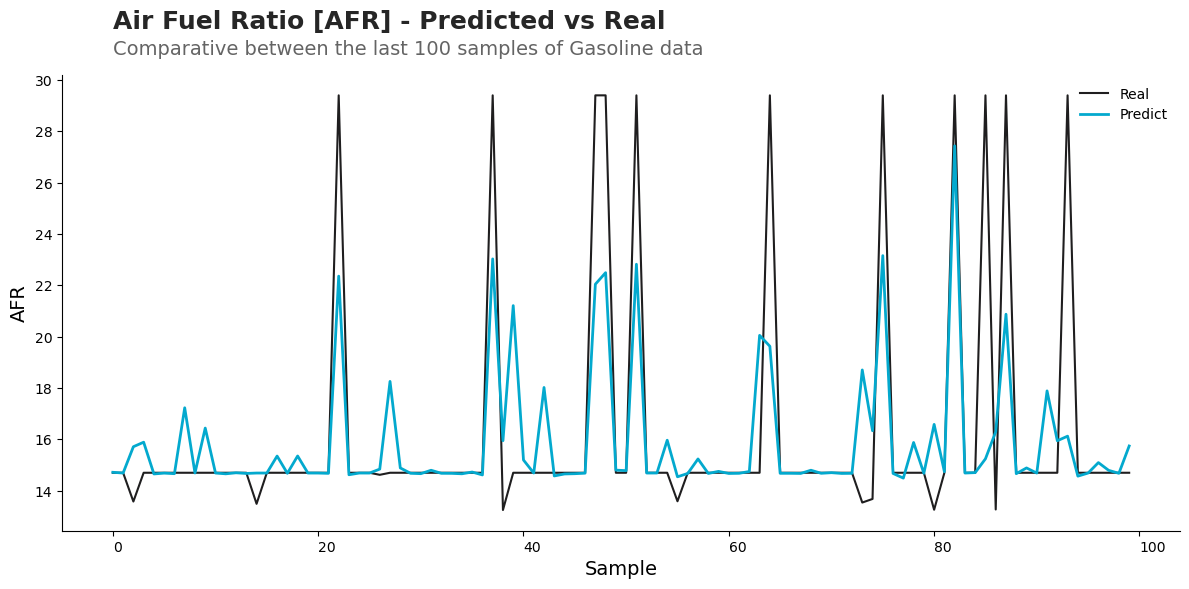

In [19]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("AFR", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

# y_pred = lr_gasoline_afr.models["LGBMRegressor"].predict(X_test_gasoline)
y_pred = model_gasoline_afr.predict(X_test_gasoline)

ax.plot(list(range(100)), y_test_gasoline[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

plt.text(0, 32, "Air Fuel Ratio [AFR] - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
plt.text(0, 31, "Comparative between the last 100 samples of Gasoline data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}gasoline_afr.png")
plt.show()

## Ethanol

In [20]:
# lr_ethanol_afr = LazyRegressor(
#     verbose=0,
#     ignore_warnings=False,
#     custom_metric=None,
#     random_state=42
# )

In [21]:
# models_ethanol_afr, predictions_ethanol_afr = lr_ethanol_afr.fit(
#     X_train_ethanol.values,
#     X_test_ethanol.values,
#     y_train_ethanol.values,
#     y_test_ethanol.values
# )

In [22]:
# models_ethanol_afr

In [23]:
model_ethanol_afr = LGBMRegressor(
    random_state=42
)

model_ethanol_afr.fit(X_train_ethanol, y_train_ethanol)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 32232, number of used features: 4
[LightGBM] [Info] Start training from score 15.583214


LGBMRegressor(random_state=42)

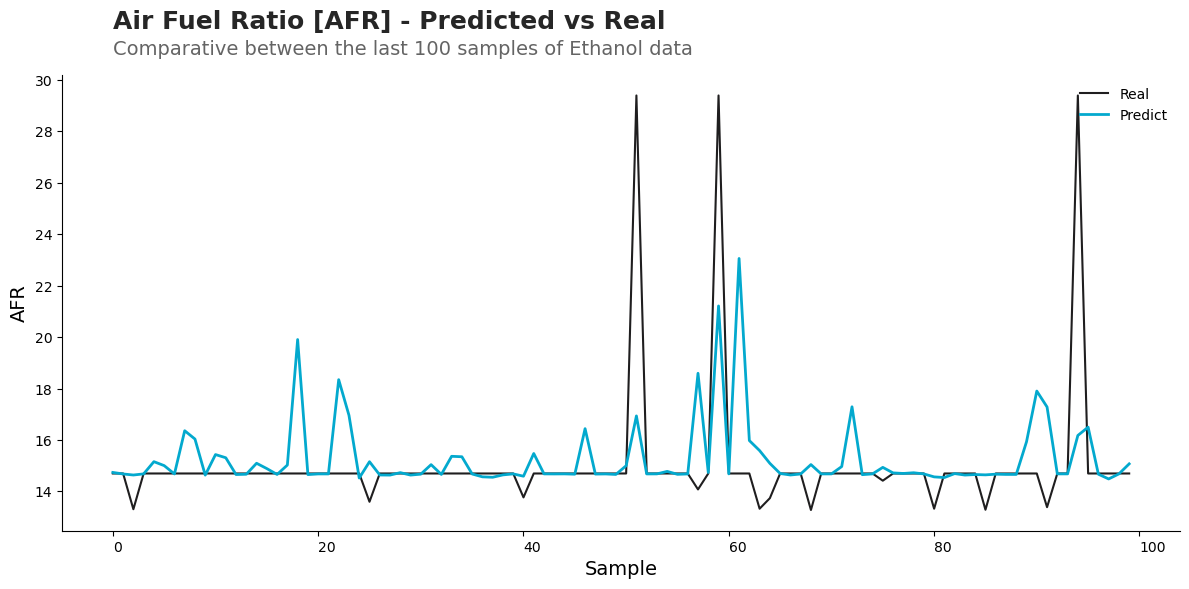

In [24]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("AFR", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

# y_pred = lr_ethanol_afr.models["LGBMRegressor"].predict(X_test_ethanol)
y_pred = model_ethanol_afr.predict(X_test_ethanol)

ax.plot(list(range(100)), y_test_ethanol[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

plt.text(0, 32, "Air Fuel Ratio [AFR] - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
plt.text(0, 31, "Comparative between the last 100 samples of Ethanol data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}ethanol_afr.png")
plt.show()

# 💾 Save Model

In [25]:
# joblib.dump(lr_gasoline_afr.models["LGBMRegressor"], "./models/LGBMRegressor_gasoline_afr.pkl")
joblib.dump(model_gasoline_afr, "./models/LGBMRegressor_gasoline_afr.pkl")

['./models/LGBMRegressor_gasoline_afr.pkl']

In [26]:
# joblib.dump(lr_ethanol_afr.models["LGBMRegressor"], "./models/LGBMRegressor_ethanol_afr.pkl")
joblib.dump(model_ethanol_afr, "./models/LGBMRegressor_ethanol_afr.pkl")

['./models/LGBMRegressor_ethanol_afr.pkl']